In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df= pd.read_csv("USArrests.csv",index_col = 0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## hopkins

In [7]:
!pip install pyclustertend

In [8]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [9]:
hopkins(scale(df),df.shape[0])

0.3761424588823674

# KMeans

In [10]:
k_means = KMeans(n_clusters = 2).fit(df)

In [11]:
clusters = k_means.labels_

In [12]:
clusters

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

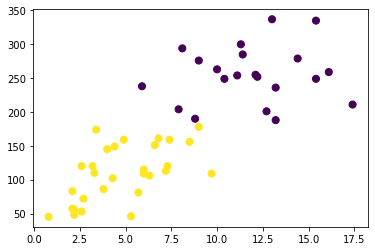

In [13]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [14]:
centroids = k_means.cluster_centers_

In [15]:
centroids

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

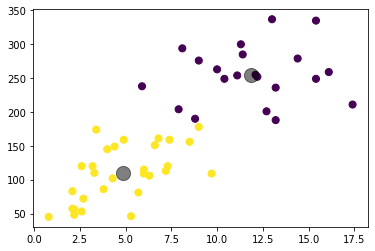

In [16]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

# Elbow Method

In [17]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

C:\Program Files\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Inertia')

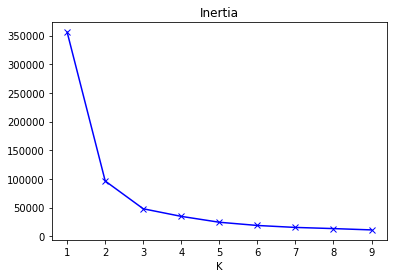

In [18]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [20]:
labels = kmeans.labels_

In [21]:
labels

array([1, 5, 8, 7, 8, 7, 2, 1, 3, 7, 0, 2, 1, 2, 0, 2, 2, 1, 6, 8, 4, 1,
       6, 5, 7, 2, 2, 1, 0, 4, 8, 1, 3, 0, 2, 4, 4, 2, 4, 5, 6, 7, 7, 2,
       0, 4, 4, 6, 0, 4])

In [22]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [23]:
df["cluster_id"] = labels

In [24]:
df.sample(10)

,Murder,Assault,UrbanPop,Rape,cluster_id
Maine,2.1,83,51,7.8,6
Michigan,12.1,255,74,35.1,1
New Jersey,7.4,159,89,18.8,4
New Hampshire,2.1,57,56,9.5,0
Iowa,2.2,56,57,11.3,0
Delaware,5.9,238,72,15.8,1
Indiana,7.2,113,65,21.0,2
Wisconsin,2.6,53,66,10.8,0
Montana,6.0,109,53,16.4,2
Oklahoma,6.6,151,68,20.0,4


In [25]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [26]:
print(f"silhouette_score(n=4): {silhouette_score(df,labels)}")

silhouette_score(n=4): 0.4311125866945892


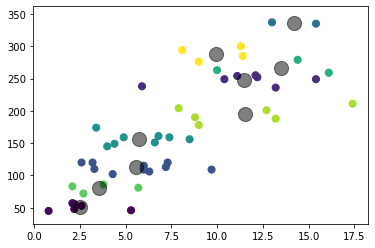

In [27]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

# ARI

In [28]:
new_df = df.sample(15)

In [29]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
New Hampshire,2.1,57,56,9.5,0
Oregon,4.9,159,67,29.3,4
Oklahoma,6.6,151,68,20.0,4
Arkansas,8.8,190,50,19.5,7
North Dakota,0.8,45,44,7.3,0
Idaho,2.6,120,54,14.2,2
New York,11.1,254,86,26.1,1
Kansas,6.0,115,66,18.0,2
Alaska,10.0,263,48,44.5,5
Tennessee,13.2,188,59,26.9,7


In [30]:
new_df["true_label"] = [2,2,2,0,1,1,2,0,0,0,3,3,3,0,2]

In [31]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
New Hampshire,2.1,57,56,9.5,0,2
Oregon,4.9,159,67,29.3,4,2
Oklahoma,6.6,151,68,20.0,4,2
Arkansas,8.8,190,50,19.5,7,0
North Dakota,0.8,45,44,7.3,0,1
Idaho,2.6,120,54,14.2,2,1
New York,11.1,254,86,26.1,1,2
Kansas,6.0,115,66,18.0,2,0
Alaska,10.0,263,48,44.5,5,0
Tennessee,13.2,188,59,26.9,7,0


In [32]:
from sklearn.metrics.cluster import adjusted_rand_score

In [33]:
adjusted_rand_score(new_df["true_label"],new_df["cluster_id"])

0.08239700374531835

In [34]:
# hierarchy clustering

In [35]:
from scipy.cluster.hierarchy import linkage

In [36]:
hc_complete = linkage(df,"complete")
hc_ward = linkage(df,"ward")

In [37]:
from scipy.cluster.hierarchy import dendrogram

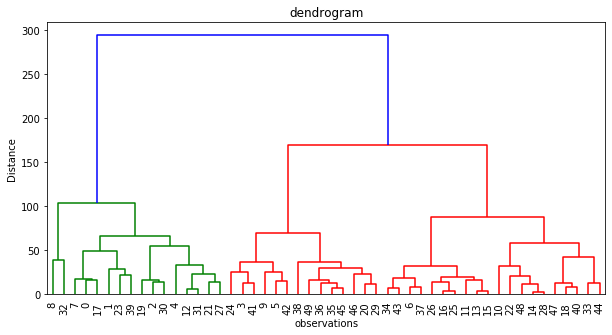

In [38]:
plt.figure(figsize= (10,5))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_complete,leaf_font_size = 10);

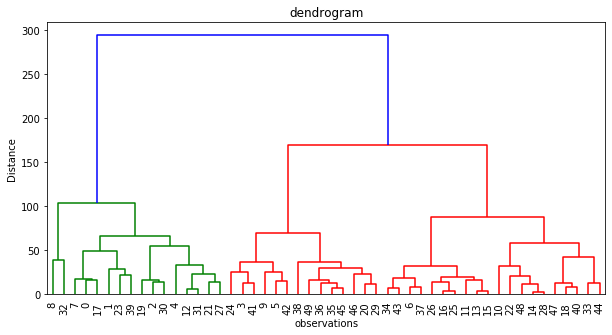

In [39]:
plt.figure(figsize= (10,5))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_complete,leaf_font_size = 10);

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
cluster = AgglomerativeClustering(n_clusters =3, affinity ="euclidean",linkage="ward")
cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [42]:
print(cluster.labels_)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


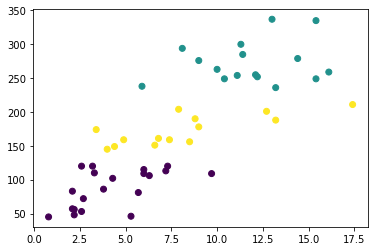

In [43]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c = cluster.labels_,cmap = "viridis")

In [44]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [45]:
print(f"silhouette_score(n=3): {silhouette_score(df,cluster.labels_)}")

silhouette_score(n=3): 0.531081701162353
